# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
1+1

2

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper
import torch.nn as nn
import torch.nn.functional as F

transofrom = transforms.Compose([transforms.ToTensor(), 
                                 transforms.Normalize((0.5),(0.5))])
trainset = datasets.FashionMNIST('/home/sergei/.pytorch/F_MNIST_data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('/home/sergei/.pytorch/F_MNIST_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False)


0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot  

In [3]:
image, label = next(iter(trainloader))

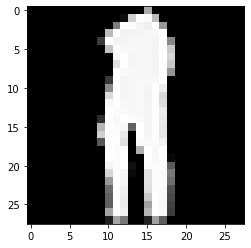

In [4]:
plt.imshow(image[0,:].permute(1,2,0).squeeze().numpy(), cmap='Greys_r');

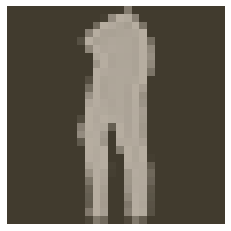

In [5]:
helper.imshow(image[0,:]);

Here we can see one of the images.

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [6]:
# TODO: Define your network architecture here

def fmnist_block(f_in, f_out):
    return nn.Sequential(*[nn.Linear(f_in, f_out), nn.ReLU()])

class fmnist(nn.Module):
    def __init__(self, layers, n_input=784, n_classes = 10):
        super().__init__()
        #add first and last dimensions
        layers.insert(0, n_input)
        layers.append(n_classes)
        net = [fmnist_block(layers[i-1], layers[i]) for i in range(1, len(layers))]
        self.net = nn.Sequential(*net)
                         
    def forward(self, x):
        return F.log_softmax(self.net(x.view(x.shape[0],-1)), dim=1)  

criterion = nn.NLLLoss()

In [7]:
#net = fmnist([128,64,32])
net = fmnist([256,128,64])

In [8]:
image.view(64,-1).shape

torch.Size([64, 784])

In [9]:
# sanity check
with torch.no_grad():
    out = net(image)
torch.exp(out).sum()

tensor(64.)

In [10]:
out.shape

torch.Size([64, 10])

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [11]:
# TODO: Create the network, define the criterion and optimizer
# done before

In [12]:
device = 'cuda:0'
#device = 'cpu'

In [26]:
def init_weights(m):
    """
    initialize weights with Kaming 
    https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79
    """
    if isinstance(m, nn.ConvTranspose2d) or isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight)
        torch.nn.init.kaiming_normal_(m.bias)

In [49]:
%%time
# TODO: Train the network here
N_EPOCH = 10
# create an optimizer
optimizer = torch.optim.Adam(net.parameters())
net.train()
net.to(device)

for epoch in range(N_EPOCH):
    running_loss = 0
    for data, labels in trainloader:
        optimizer.zero_grad()
        out = net(data.to(device))
        loss_item = criterion(out, labels.to(device))
        loss_item.backward()
        optimizer.step()
        running_loss +=loss_item.item()
    print(f'Epoch {epoch}, loss = {running_loss}')

Epoch 0, loss = 39.508250541985035
Epoch 1, loss = 31.282723180949688
Epoch 2, loss = 34.29520411044359
Epoch 3, loss = 34.46861649118364
Epoch 4, loss = 33.59513756260276
Epoch 5, loss = 30.177946653217077
Epoch 6, loss = 34.64101779833436
Epoch 7, loss = 29.571000162512064
Epoch 8, loss = 32.5916257314384
Epoch 9, loss = 33.25984952226281
CPU times: user 1min 21s, sys: 3.83 s, total: 1min 25s
Wall time: 1min 25s


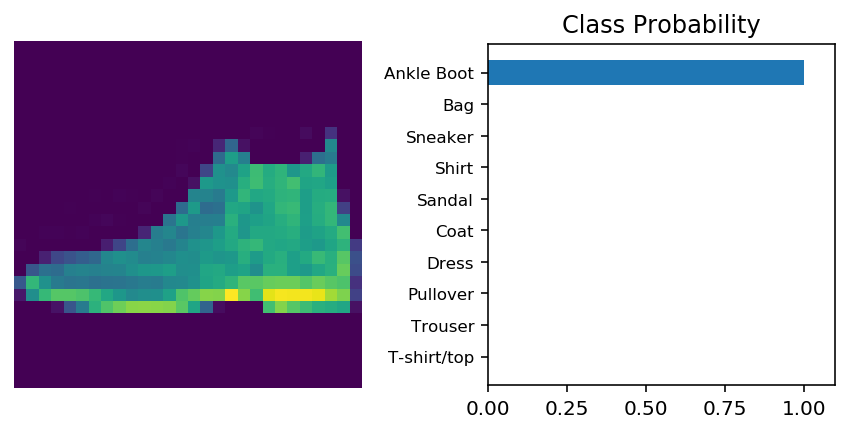

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# TODO: Calculate the class probabilities (softmax) for img
net.eval()
with torch.no_grad():
    ps = torch.exp(net(img.to(device)))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps.to('cpu'), version='Fashion')

In [57]:
img.shape

torch.Size([1, 28, 28])

### Calculate the accuracy 

In [51]:
with torch.no_grad():
    net.to(device)
    data, labels = next(iter(testloader))
    predictions = torch.exp(net(data.view(data.shape[0],-1).to(device)))

In [63]:
predictions.shape

torch.Size([10000, 10])

In [78]:
top_p, top_class = predictions[:5,:].topk(2,dim=1)

In [80]:
top_class[0]

tensor([9, 7], device='cuda:0')

In [52]:
_, predicted_classes = predictions.max(dim=1)
predicted_classes = predicted_classes.to('cpu')

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
accuracy_score(predicted_classes, labels)

0.8895

In [55]:
for i in range(0,10):
    print(f'{trainset.classes[i]:>11} : precision = {precision_score(predicted_classes==i, labels==i)} \
    recall = {recall_score(predicted_classes==i, labels==i)}')

T-shirt/top : precision = 0.841     recall = 0.8047846889952153
    Trouser : precision = 0.981     recall = 0.9761194029850746
   Pullover : precision = 0.83     recall = 0.8089668615984406
      Dress : precision = 0.878     recall = 0.9126819126819127
       Coat : precision = 0.837     recall = 0.8134110787172012
     Sandal : precision = 0.952     recall = 0.9814432989690721
      Shirt : precision = 0.681     recall = 0.7362162162162162
    Sneaker : precision = 0.974     recall = 0.9311663479923518
        Bag : precision = 0.97     recall = 0.9613478691774033
 Ankle boot : precision = 0.951     recall = 0.9674465920651069
